In [1]:
# Librerias:
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# Opciones para la visualización de los dataFrames:

# pd.set_option('max_columns', None) # Para mostrar todas las columnas de los df
# pd.set_option('max_rows', None) # Para mostrar todas las filas de los df

# pd.reset_option('max_columns') # Para volver a la visualización de columnas por default
# pd.reset_option('max_rows') # Para volver a la visualización de filas por default

## Datos de trabajo:

### Datos de entrenamiento (train data):

In [3]:
train_df = pd.read_csv('./Datos/train.csv')
train_df

,Unnamed: 0,v0,v1,v2,v3,v4,v5,v6,v7,v8,...,ae61,ae62,ae63,ae64,ae65,ae66,ae67,ae68,d69,d70
0,1651,0.00,143270.10,100.0,0.0,0.0,63090564.44,4199850.00,0.00,6240000.0,...,0,0,0,0,0,0,0,0,0,0
1,1370,0.00,1403461.97,90.0,10.0,29.0,8013913.78,8177030.69,44951.90,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2649,19800.24,63401.41,100.0,0.0,0.0,323384.60,67610.22,0.00,0.0,...,1,0,0,0,0,0,0,0,1,0
3,564,0.00,10585032.22,100.0,0.0,5.0,29596681.95,186964.54,0.00,4500000.0,...,0,0,0,0,0,0,0,0,0,0
4,2728,0.00,11259663.09,78.0,22.0,0.0,33626595.71,0.00,0.00,3972827.7,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,2732,0.00,0.00,100.0,0.0,0.0,17321789.44,6502334.11,0.00,4800000.0,...,0,0,0,0,0,0,0,1,0,0
2185,2069,0.00,148821.45,100.0,0.0,5.0,17874738.23,805330.00,0.00,4279059.0,...,0,0,0,0,0,0,0,1,0,0
2186,1018,0.00,6438.10,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,1,0,0,0,0,0,0,0,1,0
2187,2323,0.00,1309077.66,91.0,9.0,12.0,7757433.99,9312203.53,19156.47,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.rename(columns={'Unnamed: 0':'first_col'}, inplace=True)
train_df

,first_col,v0,v1,v2,v3,v4,v5,v6,v7,v8,...,ae61,ae62,ae63,ae64,ae65,ae66,ae67,ae68,d69,d70
0,1651,0.00,143270.10,100.0,0.0,0.0,63090564.44,4199850.00,0.00,6240000.0,...,0,0,0,0,0,0,0,0,0,0
1,1370,0.00,1403461.97,90.0,10.0,29.0,8013913.78,8177030.69,44951.90,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2649,19800.24,63401.41,100.0,0.0,0.0,323384.60,67610.22,0.00,0.0,...,1,0,0,0,0,0,0,0,1,0
3,564,0.00,10585032.22,100.0,0.0,5.0,29596681.95,186964.54,0.00,4500000.0,...,0,0,0,0,0,0,0,0,0,0
4,2728,0.00,11259663.09,78.0,22.0,0.0,33626595.71,0.00,0.00,3972827.7,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,2732,0.00,0.00,100.0,0.0,0.0,17321789.44,6502334.11,0.00,4800000.0,...,0,0,0,0,0,0,0,1,0,0
2185,2069,0.00,148821.45,100.0,0.0,5.0,17874738.23,805330.00,0.00,4279059.0,...,0,0,0,0,0,0,0,1,0,0
2186,1018,0.00,6438.10,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,1,0,0,0,0,0,0,0,1,0
2187,2323,0.00,1309077.66,91.0,9.0,12.0,7757433.99,9312203.53,19156.47,0.0,...,0,0,0,0,0,0,0,0,0,0


**NOTA:**
En principio vemos mezcla de variables binarias con otras cuyos rangos de distribución parecen ser mucho mayores.

In [5]:
# Cargando etiquetas del conjunto de entrenamiento (training labels):
train_labels_df = pd.read_csv('./Datos/train_label.csv', header=None)
train_labels_df.rename(columns={0:'train_labels'}, inplace=True)
train_labels_df

,train_labels
0,0.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
2184,0.0
2185,0.0
2186,0.0
2187,1.0


### Análisis exploratorio de los datos de entrenamiento:

**Dimensión del conjunto de entrenamiento:**

In [6]:
print(f'Dimensión del conjunto de entrenamiento: {train_df.shape}')

Dimensión del conjunto de entrenamiento: (2189, 72)


**Información del conjunto de entrenamiento:** \
Adicionalmente se verifica la presencia de datos nulos.

In [7]:
# train_df.isnull().sum()
#train_df.dtypes
train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189 entries, 0 to 2188
Data columns (total 72 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   first_col  2189 non-null   int64  
 1   v0         2189 non-null   float64
 2   v1         2189 non-null   float64
 3   v2         2189 non-null   float64
 4   v3         2189 non-null   float64
 5   v4         2189 non-null   float64
 6   v5         2189 non-null   float64
 7   v6         2189 non-null   float64
 8   v7         2189 non-null   float64
 9   v8         2189 non-null   float64
 10  v9         2189 non-null   float64
 11  v10        2189 non-null   float64
 12  v11        2189 non-null   float64
 13  v12        2189 non-null   float64
 14  v13        2189 non-null   float64
 15  v14        2189 non-null   float64
 16  v15        2189 non-null   float64
 17  v16        2189 non-null   float64
 18  v17        2189 non-null   float64
 19  v18        2189 non-null   float64
 20  v19     

**NOTA:** \
Luego de realizar un análisis más detallado de las carácticas de los datos de entrenamiento, podemos establecer que no hay presencia de datos nulos (o datos faltantes) ni presencia de variables categóricas.
Todas las variables son de tipo numérico, con diferencia de tipo entre las binarias y no binarias. Adicionalmente, es necesario resaltar que la nomenclatura de los datos no permite hacer ningún tipo de asociación entre las variables del problema y de esta manera, en este punto no es posible plantar hipótesis sobre los datos.

**Descripción del conjunto de entrenamiento:**

In [8]:
train_df.describe()

,first_col,v0,v1,v2,v3,v4,v5,v6,v7,v8,...,ae61,ae62,ae63,ae64,ae65,ae66,ae67,ae68,d69,d70
count,2189.000000,2.189000e+03,2.189000e+03,2189.000000,2189.000000,2189.000000,2.189000e+03,2.189000e+03,2.189000e+03,2.189000e+03,...,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.0
mean,1457.217908,2.789336e+04,2.498074e+06,87.098675,10.317953,3.608040,7.332287e+07,1.011043e+07,1.126268e+04,2.283687e+06,...,0.034719,0.371859,0.004111,0.021928,0.004568,0.014619,0.007766,0.044312,0.122430,0.0
std,842.158691,2.770920e+05,3.713769e+06,29.548930,25.922405,8.477891,3.009257e+08,4.209394e+07,1.540442e+05,3.283374e+06,...,0.183109,0.483412,0.064003,0.146481,0.067450,0.120048,0.087803,0.205835,0.327857,0.0
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,731.000000,0.000000e+00,1.411988e+04,100.000000,0.000000,0.000000,2.898817e+06,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1453.000000,0.000000e+00,1.781006e+05,100.000000,0.000000,0.000000,1.623024e+07,1.970460e+04,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,2188.000000,0.000000e+00,3.958601e+06,100.000000,0.000000,5.000000,3.308427e+07,2.560791e+06,0.000000e+00,4.355600e+06,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,2907.000000,5.030246e+06,1.257078e+07,100.000000,100.000000,183.000000,3.283312e+09,4.415314e+08,2.427617e+06,1.000000e+07,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


**NOTA:** \
Hasta el momento comprobamos que los datos de entrenamiento y validación no poseen información faltante. También que exíste un número significativo de variables binarias (en ambos casos) cuyos desvíos estándar son casi iguales, y en algunos casos mayores, al valor medio de la variable. Esto nos estaría indo la presencia de outliers en los datos.

De esta manera, y con el fin de conocer un poco más los datos de trabajo, se procede graficar y analizar las distribuciones de cada una de las variables de entrenamiento. Para esto hacemos uso de histogramas, los cuales se muestran a continuación.

**Distribución de los datos de entrenamiento:**

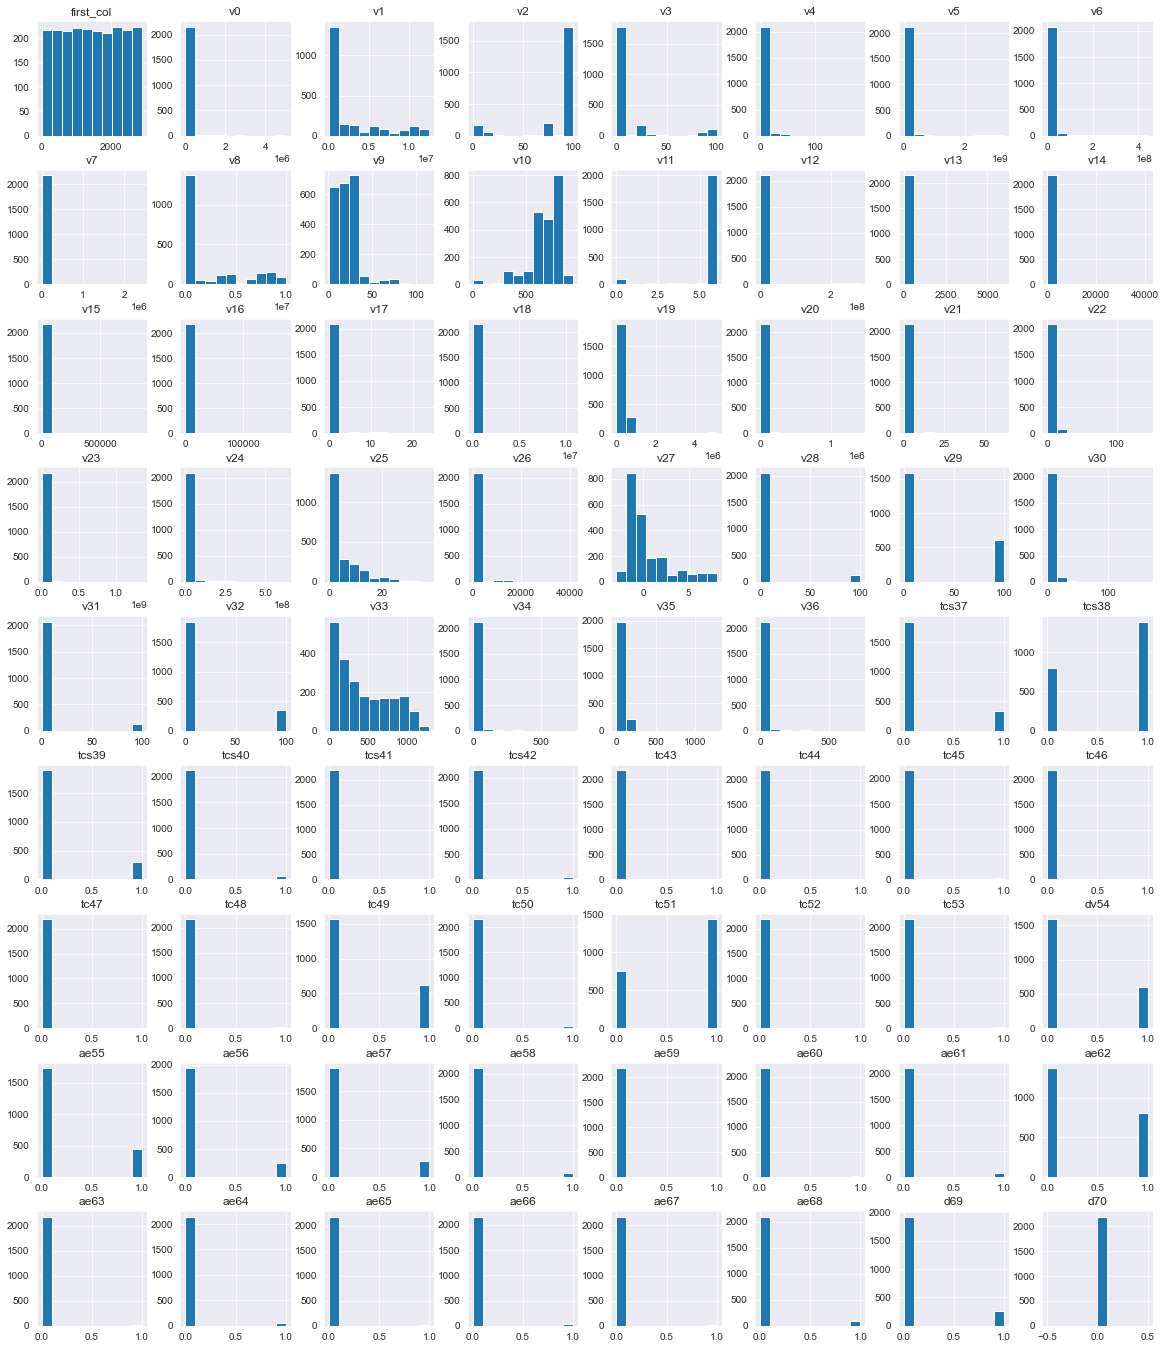

In [9]:
train_df.hist(figsize=(20,24))
plt.show()

**NOTA:** \
De los anteriores histogramas podemos destacar los comportamientos de las variables v1 a v36, en donde los amplios rangos de valores tomados podrían favorer el proceso de clasificación. Respecto a las variables binarias, no es posible determinar relación alguna entre ellas.

Con el fin de mejorar el entendimiento de las variables de entrenamiento a usar, graficamos la relación que guarda cada variable con su respectiva etiqueta de salida (1: crédito no pagado a tiempo, 0: crédito pagado a tiempo) con la intención de detectar variables de mayor peso que otras.

### Otra aproximación a la visualización de los datos:

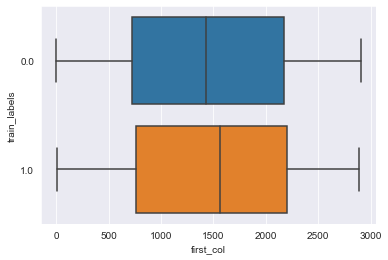

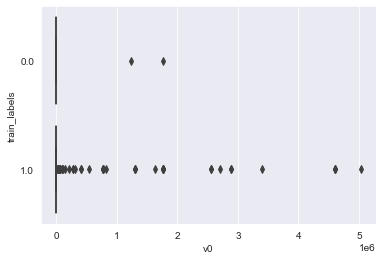

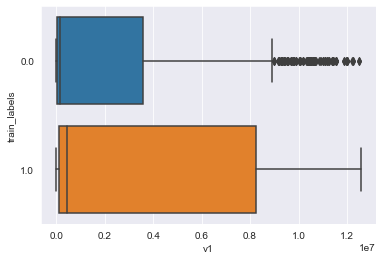

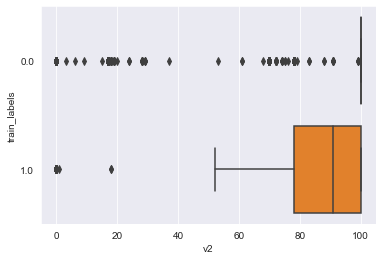

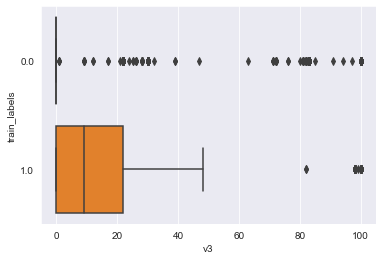

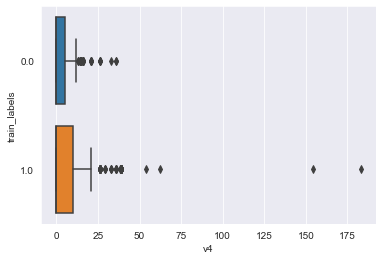

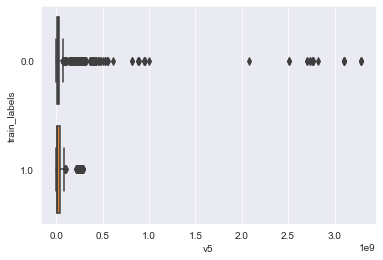

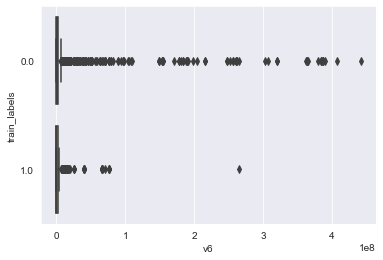

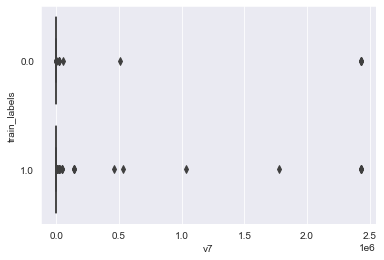

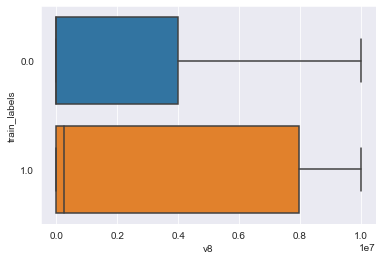

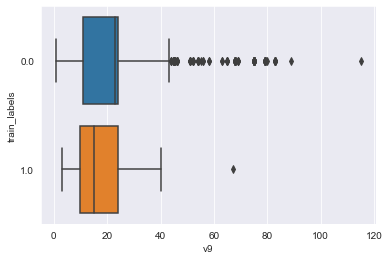

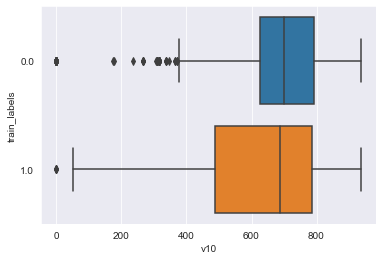

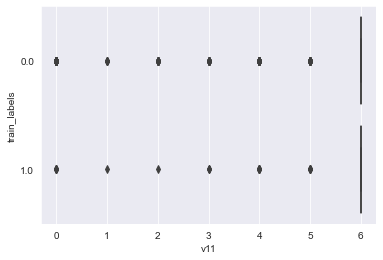

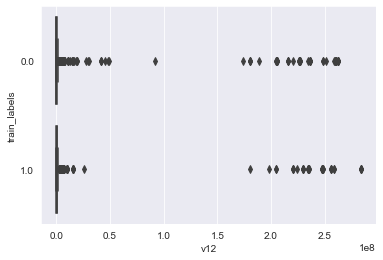

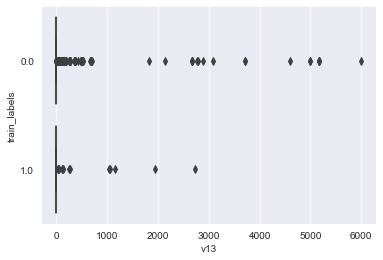

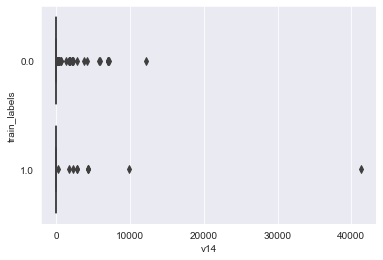

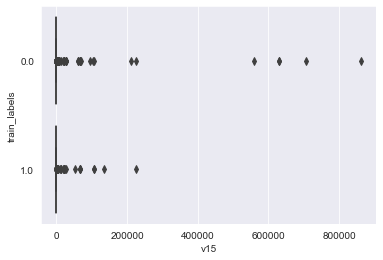

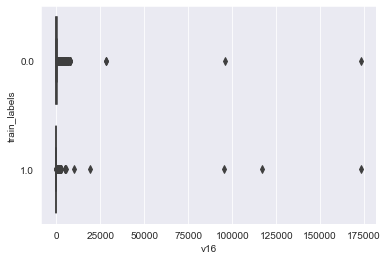

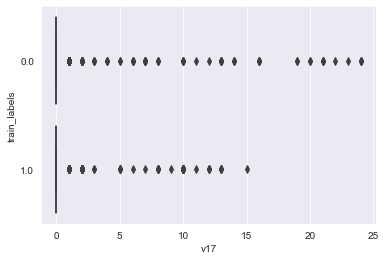

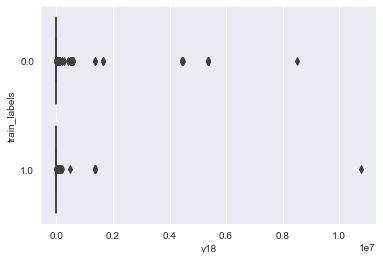

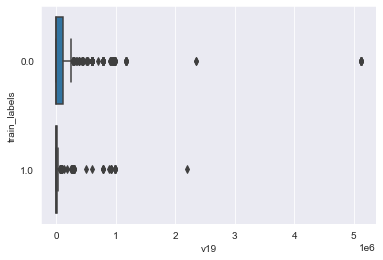

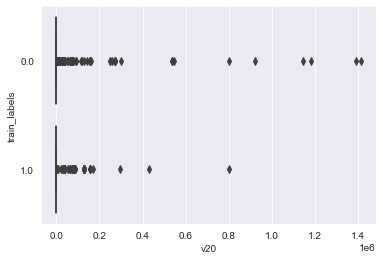

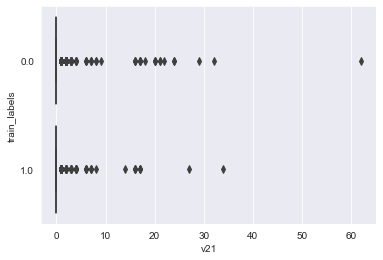

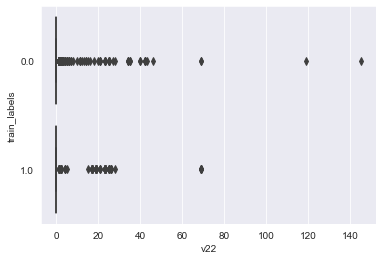

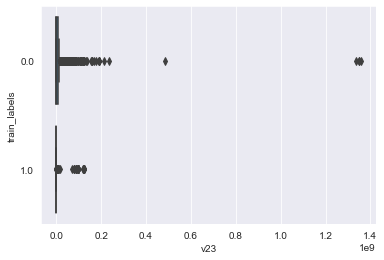

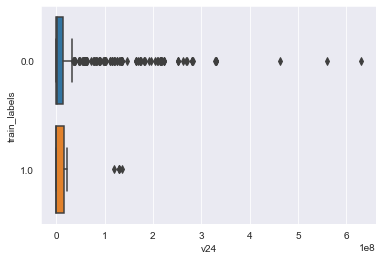

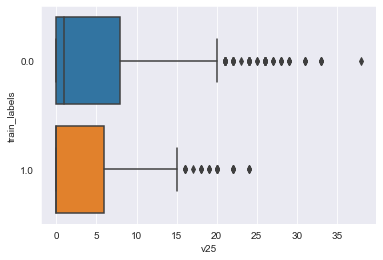

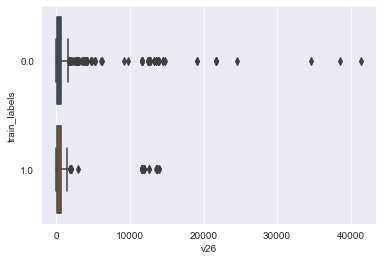

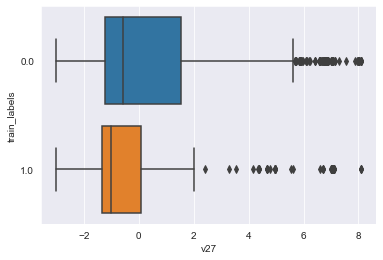

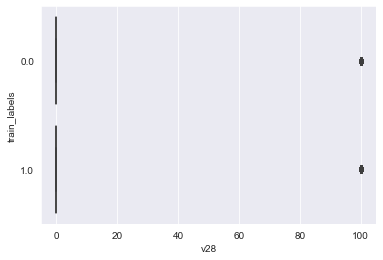

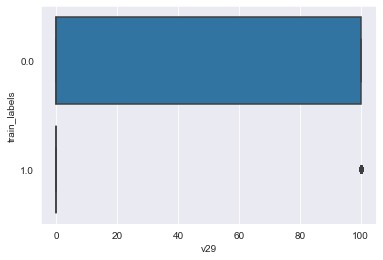

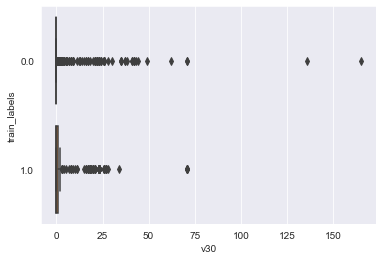

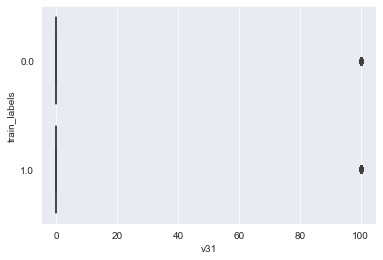

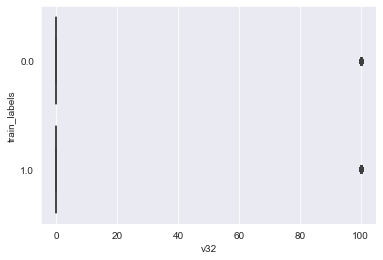

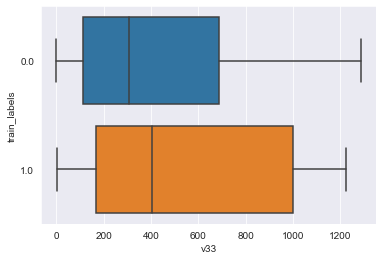

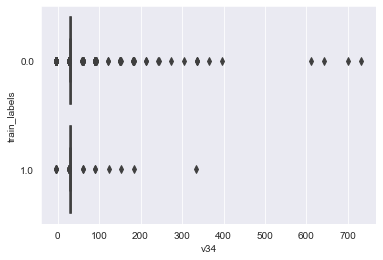

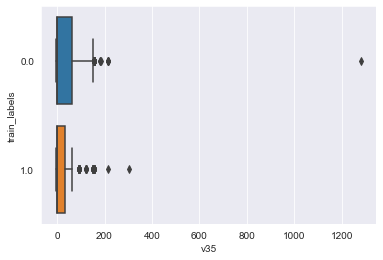

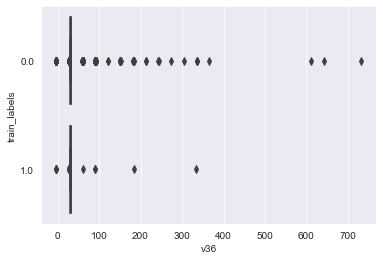

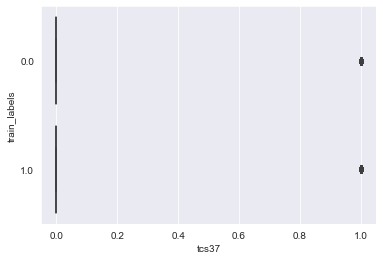

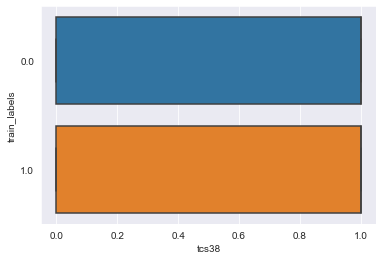

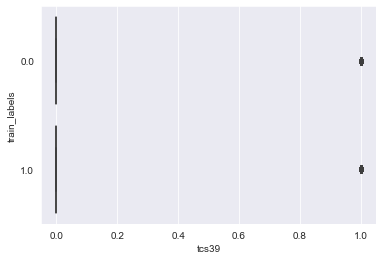

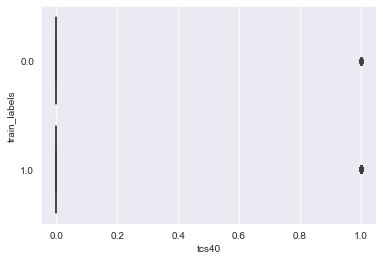

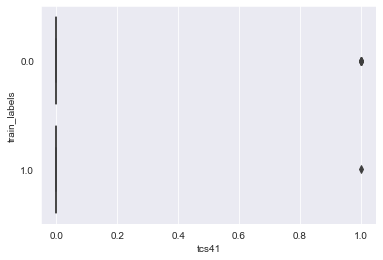

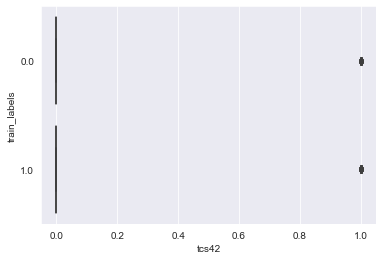

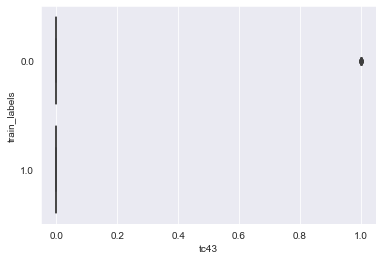

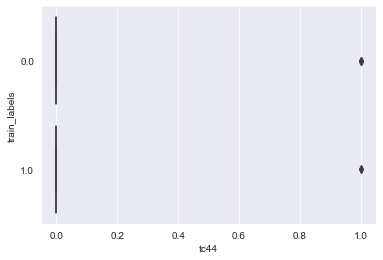

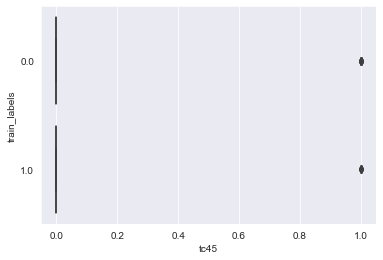

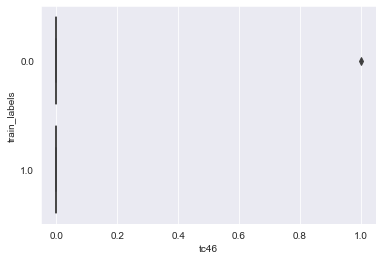

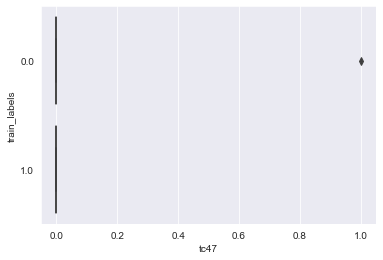

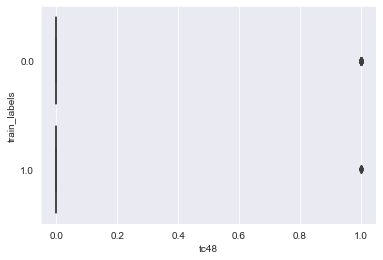

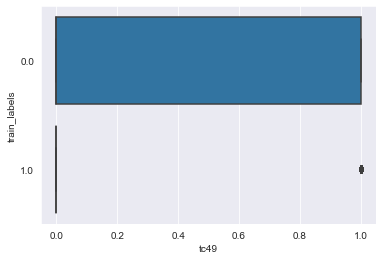

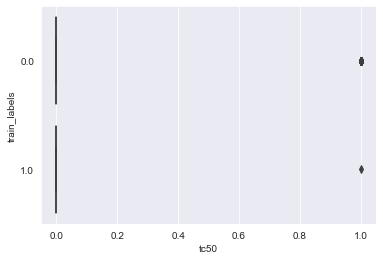

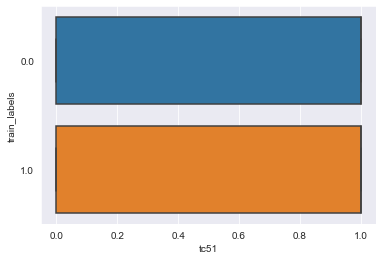

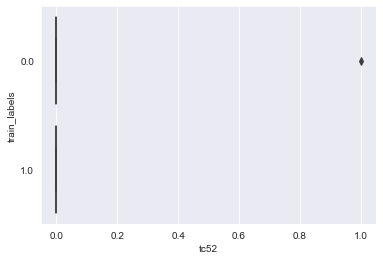

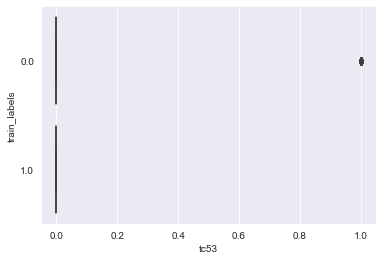

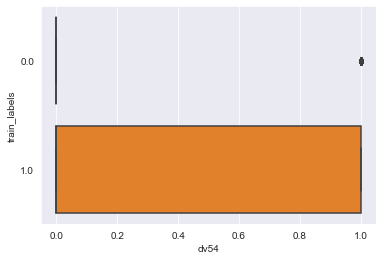

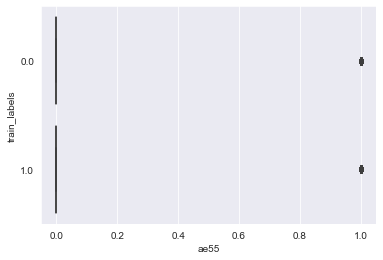

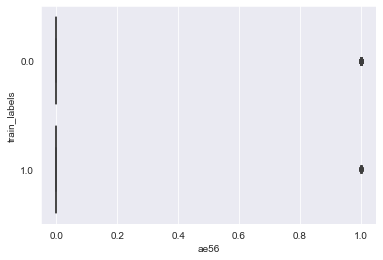

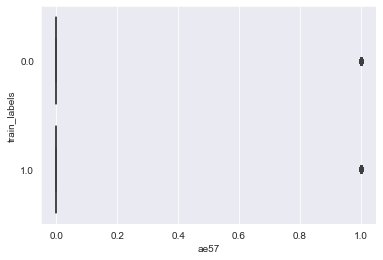

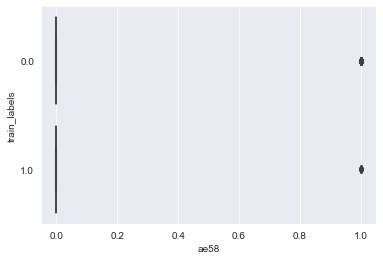

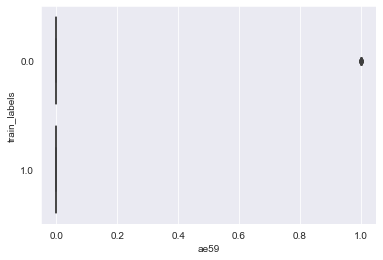

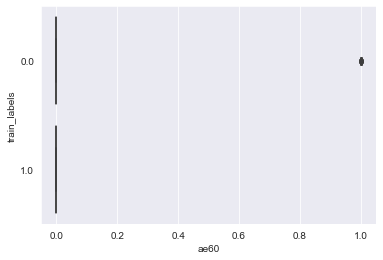

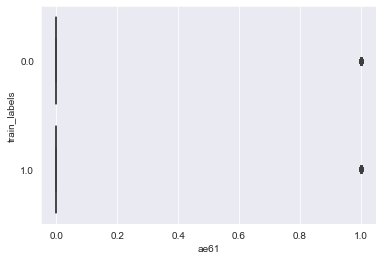

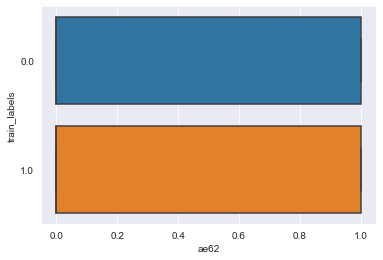

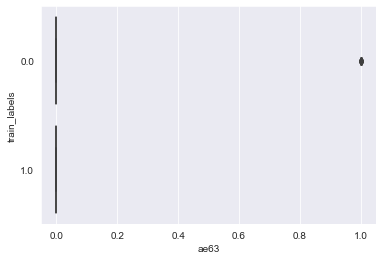

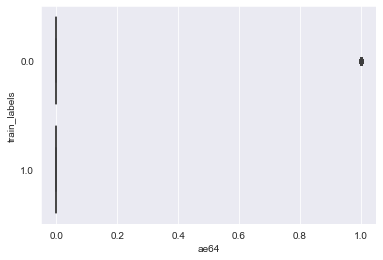

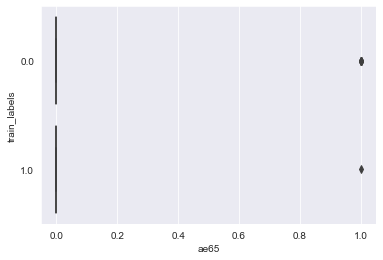

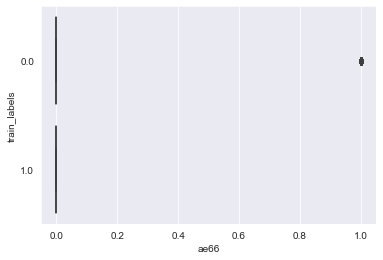

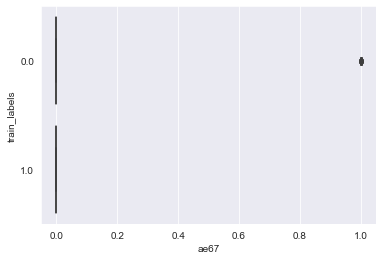

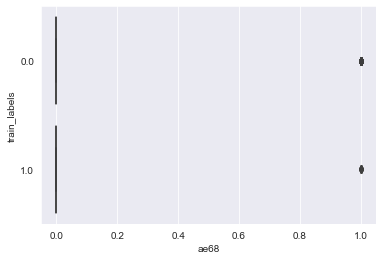

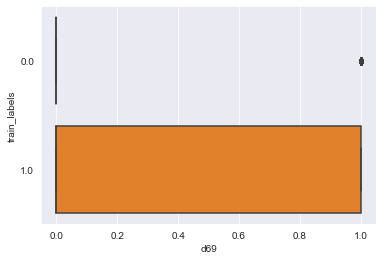

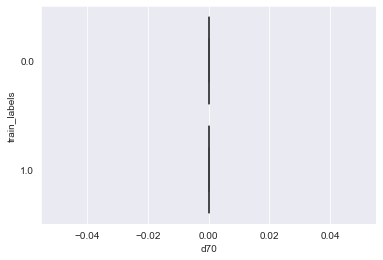

In [10]:
# BoxPlots: Datos vs etiquetas
col_names = train_df.columns
for col in col_names:
    sns.boxplot(y=train_labels_df['train_labels'].astype('category'), x=col, data=train_df)
    plt.show()

## Comentarios respecto a los datos de entrenamiento:

Luego de analizar los distintos gráficos realizados, y al no tener conocimento sobre el significado de las variables de trabajo, no es posible determinar la presencia de algún comportamiento característico de los datos de tabajo.
Por otra parte se puede observar que las variables de naturaleza binaria tiene mucha similitud en sus distribuciones estadísticas y en la forma en la cual se distribuyen respecto a cada clase de clasificación (target). Esto podría ser un indicador de información redundante que afecte el desempeño de los algoritmos de clasificación, sin embargo esta hipótesis será puesta a prueba en el notebook de entrenamiento y validación.\
Por otra parte, se pueden ver muchos outliers en las variables binarias, pero en este punto de nuestro análisis no es posible determinar si estos datos espúreos beneficien o no en el proceso de entrenamiento de los algoritmos de clasificación.

### Datos de validación (test data):

In [11]:
test_df = pd.read_csv('./Datos/test.csv')
test_df.rename(columns={'Unnamed: 0':'first_col'}, inplace=True)
test_df

,first_col,v0,v1,v2,v3,v4,v5,v6,v7,v8,...,ae61,ae62,ae63,ae64,ae65,ae66,ae67,ae68,d69,d70
0,2269,0.00,0.10,29.0,71.0,0.0,4.206076e+07,2445379.88,0.0,8000000.0,...,0,0,0,0,0,0,0,1,0,0
1,2709,0.00,0.00,100.0,0.0,3.0,6.356591e+06,1151315.35,0.0,3798381.6,...,0,0,0,0,0,0,0,1,0,0
2,2345,0.00,0.00,100.0,0.0,0.0,1.834357e+08,8136692.18,0.0,8000000.0,...,0,0,0,0,0,0,0,0,0,0
3,2810,0.00,104207.83,100.0,0.0,0.0,7.515544e+07,4211350.00,0.0,6240000.0,...,0,0,0,0,0,0,0,0,0,0
4,1199,87791.71,460376.03,94.0,6.0,26.0,8.624776e+07,39737205.73,0.0,8000000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1425,0.00,813216.41,100.0,0.0,0.0,1.642559e+07,0.00,0.0,3071719.0,...,0,0,0,0,0,0,0,0,0,0
544,223,0.00,39690.33,100.0,0.0,0.0,7.174000e+07,0.00,0.0,10000000.0,...,0,1,0,0,0,0,0,0,0,0
545,910,0.00,43754.09,100.0,0.0,0.0,9.366955e+07,0.00,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
546,2692,0.00,10484136.23,100.0,0.0,4.0,2.858129e+07,423747.53,0.0,4500000.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Loading test labels:
test_labels_df = pd.read_csv('./Datos/test_label.csv', header=None)
test_labels_df.rename(columns={0:'test_labels'}, inplace=True)
test_labels_df

,test_labels
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
543,0.0
544,0.0
545,0.0
546,0.0


**Distribución de los datos de validación:**

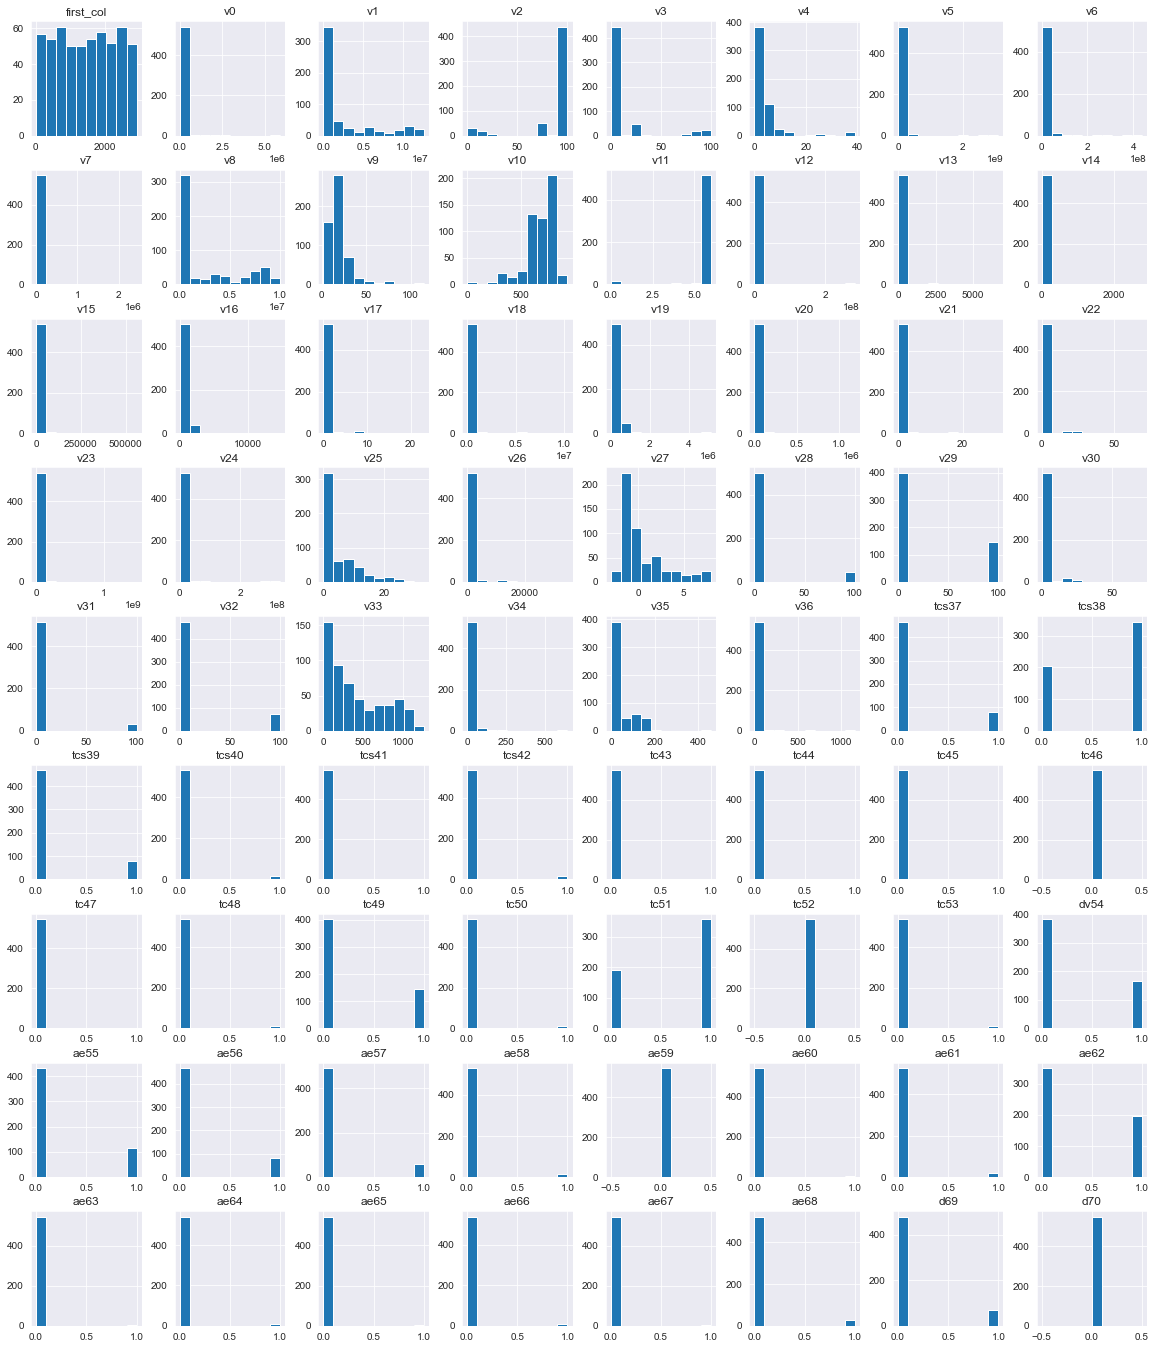

In [13]:
test_df.hist(figsize=(20,24))
plt.show()

## Comentarios respecto a los datos de validación:

Los datos de validación siguen la misma tendencia del conjunto de entrenamiento. No hay presencia de datos faltantes o categóricos. Por tal manera se procede al notebook de entrenamiento y validación.